<br> <center><font color = #003366 size=6>COMP0041- Applied Computational Finance</font></center>

<center><font color = #003366 size=6>Python Coursework</font></center>

<font color = #003366 size=3>Name: Mario Tawfelis</font>

<font color = #003366 size=3>SN: 19061361</font>

### Pyhton packages

In [1]:
from IPython.display import Latex # this is required to display mathematical notations and more 
from math import * # this is required for some of the maths function
from sympy import *
from scipy.stats import norm
import numpy as np
import sys

### Approximating a Cumulative Distribution Function (CDF) 

In [2]:
def CDF(X):
    (a1,a2,a3,a4,a5) = (0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429)
    x=abs(X)
    k=1/(1+0.2316419*x)
    n=(1/sqrt(2*pi))*exp(-0.5*x**2)
    N=1.0-n*(a1*k+a2*k**2+a3*pow(k,3)+a4*pow(k,4)+a5*pow(k,5))
    if X<0:
        N=1.0-N
    return N

In [29]:
# Test

### PDF Function

In [1]:
def PDF(x):
    return (1/sqrt(2*pi))*exp(-0.5*x**2)

In [30]:
# Test

## Input function
This function allows the user to input data needed for compuatations. The function takes one argument which contains the text to be prompted to the user clarifying what it required to be input.

In [6]:
def input_data():
    stock = float(input("Enter the stock price: "))
    strike = float(input("Enter the strike: "))
    r = float(input("The risk-free rate is: "))
    div = float(input("Dividend yield = ")) 
    sigma = float(input("What is the volatility? "))
    T = float(input("Enter the option's expiry: "))
    t = float(input("t=? "))
    tau = T-t
    
    d1 = get_d1(stock,strike,r,sigma,div,tau)
    d2 = get_d2(d1,sigma,tau)

    return d1, d2, stock, strike, r, sigma, div, tau

In [30]:
# Test
input_data()

Enter the stock price: 50
Enter the strike: 50
The risk-free rate is: 0.02
Dividend yield = 0.02
What is the volatility? 0.02
Enter the option's expiry: 2
t=? 1


(0.0100000000000000, -0.0100000000000000, 50.0, 50.0, 0.02, 0.02, 0.02, 1.0)

## Output function

In [7]:
def output(call, put):
    print("The call has price: %.3f" % call)
    print("The put has value: %.3f\n" % put)

In [8]:
# Test
output(1,2)

The call has price: 1.000
The put has value: 2.000



## Option Pricing

### Precomputation of $d_1$ and $d_2$

This function handles the computation of $d_1$ and $d_2$ to avoid code repetition.

In [9]:
def get_d1(stock,strike,r,sigma,div,tau):
    Moneyness = log(stock/strike,e)
    Shift = r - div + 0.5*sigma**2
    d1 = (Moneyness+Shift*tau)/(sigma*sqrt(tau))
    return d1

def get_d2(d1,sigma,tau):
    d2 = d1 - sigma*sqrt(tau)
    return d2

In [10]:
# Test

### Binary Options
#### Inputs
- stock: Stock Price
- strike: Strike Price
- r: Risk-Free Rate
- div: Dividend Yield
- sigma: Volatility
- tau: Time to Expiry

In [11]:
# Binary Option

def binary_options(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call =  exp(-r*tau)*CDF(d2)       
    put = exp(-r*tau)*CDF(-d2)
    
    output(call, put)
 

In [12]:
# Test

## The Greeks

Below are functions to compute the greeks for European calls and puts; and Binary calls and puts.

#### The greeks computed are:
- Delta ($\Delta$)
- Theta ($\Theta$)
- Rho ($\rho$)
- Vega ($vega$)

### Delta ($\Delta$)

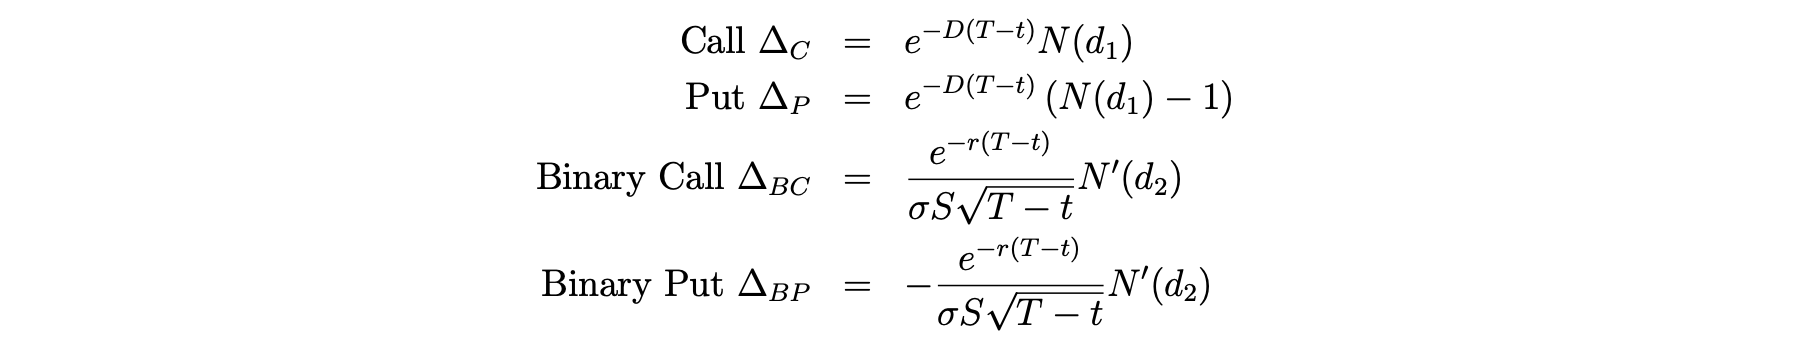

In [13]:
def delta_european(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)

    call = exp(-div*tau)*CDF(d1)
    put = exp(-div*tau)*CDF(-d1)
    
    print("Delta:")
    output(call, put)

In [14]:
# Test

In [15]:
def delta_binary(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = (exp(-r*tau)/sigma*stock*tau)*PDF(d2)
    put = call
    
    print("Delta:")
    output(call, put)

In [16]:
# Test

### Theta ($\Theta$)

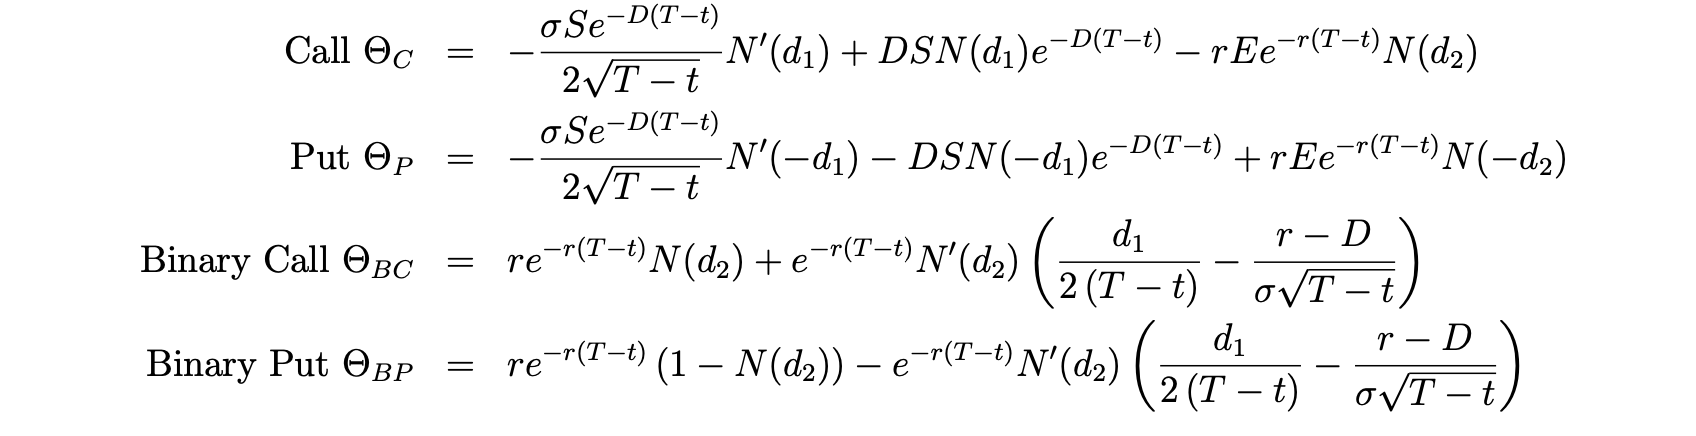

In [17]:
def theta_european(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = -sigma*stock*exp(-div*tau)*PDF(d1)/sqrt(tau) + div*stock*CDF(d1)*exp(-div*tau) - r*strike*exp(-r*tau)*CDF(d2) 
    put = -sigma*stock*exp(-div*tau)*PDF(-d1)/sqrt(tau) - div*stock*CDF(-d1)*exp(-div*tau) + r*strike*exp(-r*tau)*CDF(-d2)
    
    print("Theta:")
    output(call, put)

In [18]:
# Test

In [19]:
def theta_binary(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = r*exp(-r*tau)*CDF(d2) + exp(-r*tau)*PDF(d2)*((d1/2*tau) - (r-div/sigma*sqrt(tau)))
    put = r*exp(-r*tau)*(1-CDF(d2)) - exp(-r*tau)*PDF(d2)*((d1/2*tau) - (r-div/sigma*sqrt(tau)))
    
    print("Theta:")
    output(call, put)

In [20]:
# Test

### Rho ($\rho$)

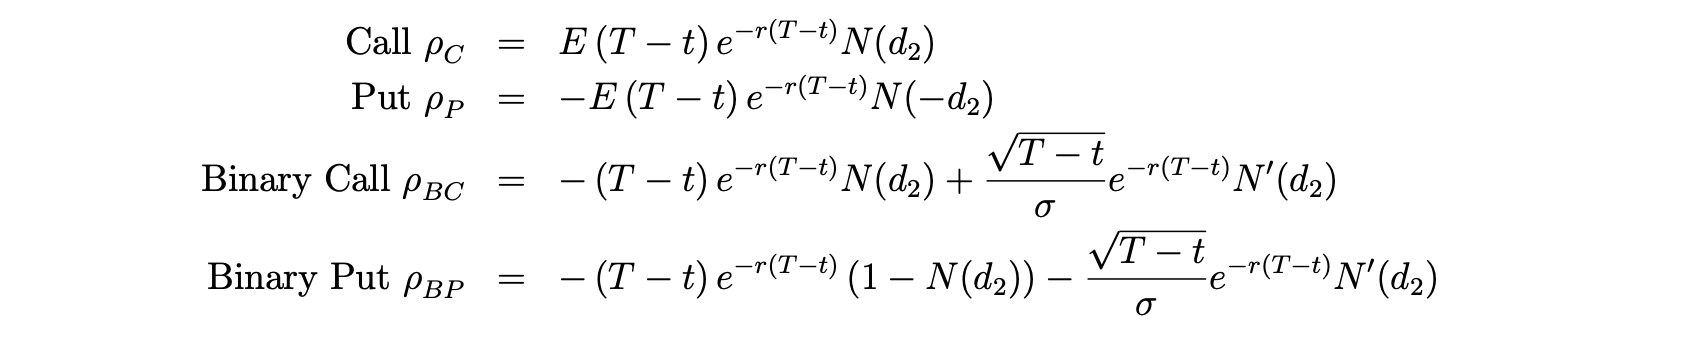

In [21]:
def rho_european(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = strike*tau*exp(-r*tau)*CDF(d2)
    put = -strike*tau*exp(-r*tau)*CDF(-d2)
    
    print("Rho:")
    output(call, put)

In [22]:
# Test

In [23]:
def rho_binary(d1, d2, stock, strike, r, sigma, div, tau):      
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = -tau*exp(-r*tau)*CDF(d2) + (sqrt(tau)/sigma)*exp(-r*tau)*PDF(d2)
    put = -tau*exp(-r*tau)*(1-CDF(d2)) - (sqrt(tau)/sigma)*exp(-r*tau)*PDF(d2)
    
    print("Rho:")
    output(call, put)

In [24]:
# Test

### Vega ($vega$)

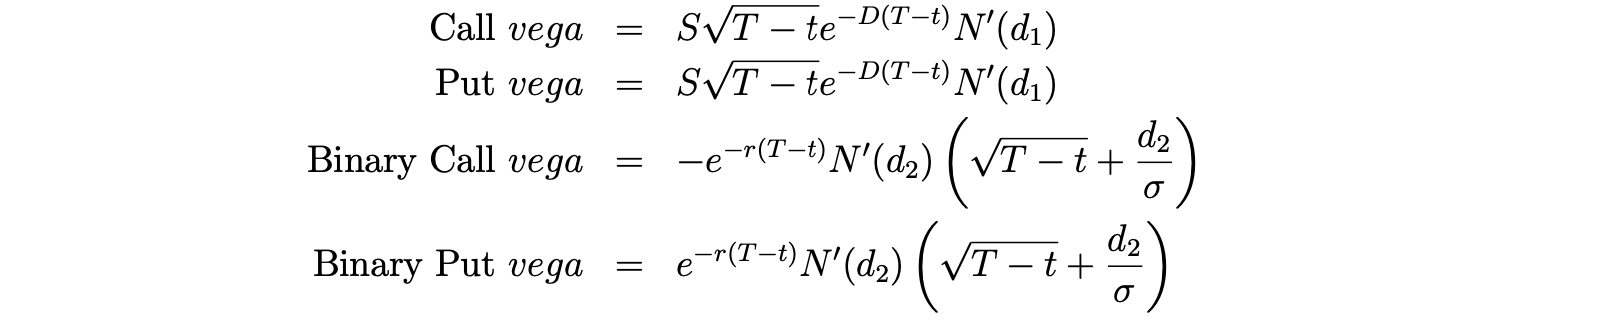

In [25]:
def vega_european(d1, d2, stock, strike, r, sigma, div, tau): 
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = stock*sqrt(tau)*exp(-div*tau)*PDF(d1)
    put = call
    
    print("Vega:")
    output(call, put)

In [26]:
# Test

In [27]:
def vega_binary(d1, d2, stock, strike, r, sigma, div, tau):
    #d1 = get_d1(stock,strike,r,sigma,div,tau)
    #d2 = get_d2(d1,sigma,tau)
    
    call = -exp(-r*tau)*PDF(d2)*(sqrt(tau)+d2/sigma)
    put = exp(-r*tau)*PDF(d2)*(sqrt(tau)+d2/sigma)
    
    print("Vega:")
    output(call, put)

In [92]:
# Test

## Menu - Start of program

This is one way to run the program which provides the user with a menu containing the available functions
### NOTE:
Please run the rest of the code first to avoid getting errors.

In [28]:
def menu():
    print("This program allows you to do the following:\n")
    print("\t1)Price binary calls and puts\n")
    print("\t2)Calculate the following Greeks for European and Binary options:\n")
    print("\t\ta)Delta\n")
    print("\t\tb)Theta\n")
    print("\t\tc)Rho\n")
    print("\t\td)Vega\n")
    
    option = int(input("Please type in 1 for Binary Options, or 2 for the Greeks:"))
  
    while (option != 1 and option != 2):
        option = int(input("Please type in 1 for Binary Options, 2 for the Greeks, or 0 to exit:\t"))
        
        if option == 0:
            return
    
    
    d1, d2, stock, strike, r, sigma, div, tau = input_data() 
        
    if option == 1:
        binary_options(d1, d2, stock, strike, r, sigma, div, tau)
        
    if option == 2:
        greek = input("Please type in the Greek (from list above) that you wish to compute, or type in 'all' to compute all Greeks:")
        print('\n')
        
        if greek.upper() == "DELTA":
            print("European:\n")
            delta_european(d1, d2, stock, strike, r, sigma, div, tau)
            
            print("Binary:\n")
            delta_binary(d1, d2, stock, strike, r, sigma, div, tau)

        elif greek.upper() == "THETA":
            print("European:\n")
            theta_european(d1, d2, stock, strike, r, sigma, div, tau)
            
            print("Binary:\n")
            theta_binary(d1, d2, stock, strike, r, sigma, div, tau)
            
        elif greek.upper() == "RHO":
            print("European:\n")
            rho_european(d1, d2, stock, strike, r, sigma, div, tau)
            
            print("Binary:\n")
            rho_binary(d1, d2, stock, strike, r, sigma, div, tau)
            
        elif greek.upper() == "VEGA":
            print("European:\n")
            vega_european(d1, d2, stock, strike, r, sigma, div, tau)
            
            print("Binary:\n")
            vega_binary(d1, d2, stock, strike, r, sigma, div, tau)
            
        elif greek.upper() == "ALL":
            print("European:\n")
            delta_european(d1, d2, stock, strike, r, sigma, div, tau)
            theta_european(d1, d2, stock, strike, r, sigma, div, tau)
            rho_european(d1, d2, stock, strike, r, sigma, div, tau)
            vega_european(d1, d2, stock, strike, r, sigma, div, tau)
            
            print("Binary:\n")
            delta_binary(d1, d2, stock, strike, r, sigma, div, tau)
            theta_binary(d1, d2, stock, strike, r, sigma, div, tau)
            rho_binary(d1, d2, stock, strike, r, sigma, div, tau)
            vega_binary(d1, d2, stock, strike, r, sigma, div, tau)

In [ ]:
menu()